In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.layers import Flatten, Dense
from keras.models import Model, load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing import image

In [2]:
def preprocessingImages(path):
    """
    :param path:
    :return: pre processed images
    """
    image_data = ImageDataGenerator(zoom_range=0.2,
                                    shear_range=0.2,
                                    preprocessing_function= preprocess_input, 
                                    horizontal_flip=True)

    image = image_data.flow_from_directory(directory=path, 
                                           target_size=(244, 244), 
                                           batch_size=32, 
                                           class_mode='binary')

    return image

In [3]:
def preprocessingImages2(path):
    """
    :param path:
    :return: pre processed images
    """
    image_data = ImageDataGenerator(preprocessing_function= preprocess_input)

    image = image_data.flow_from_directory(directory=path, 
                                           target_size=(244, 244), 
                                           batch_size=32, 
                                           class_mode='binary')

    return image


In [6]:
path = "\Brain Tumor Data Set/train"
train_data = preprocessingImages(path)

Found 4600 images belonging to 2 classes.


In [7]:
path = "\Brain Tumor Data Set/test"
test_data = preprocessingImages2(path)

Found 4600 images belonging to 2 classes.


In [8]:
path = "\Brain Tumor Data Set/val"
val_data = preprocessingImages2(path)

Found 679 images belonging to 2 classes.


In [9]:
base_model = MobileNet (input_shape=(224, 224,3), include_top= False)

In [10]:
for layer in base_model.layers: 
    layer.trainable = False

In [11]:
base_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [12]:
X = Flatten() (base_model.output)
X = Dense(units=1, activation='sigmoid')(X)

model = Model(base_model.input, X)

In [13]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

In [14]:
# compile the model
model.compile(optimizer='rmsprop', loss= keras.losses.binary_crossentropy, metrics=['accuracy'])

In [15]:
# call backs
from keras.callbacks import ModelCheckpoint, EarlyStopping
# model Check point
mc = ModelCheckpoint(filepath="bestmodel.h5", monitor='val_accuracy', verbose= 1, save_best_only= True)

# Early Stopping
es = EarlyStopping (monitor="val_accuracy", min_delta= 0.01, patience= 3, verbose= 1)

cb = [mc, es]

In [ ]:
# train the model
# pretrainde model
hist = model.fit(train_data,
                          steps_per_epoch= 8, 
                          epochs= 30,
                          validation_data= val_data,
                          validation_steps= 16, 
                          callbacks= cb)

Epoch 1/30
8/8 [==============================] - 13s 565ms/step - loss: 9.8407 - accuracy: 0.5938 - val_loss: 2.1774 - val_accuracy: 0.7949

Epoch 00001: val_accuracy improved from -inf to 0.79492, saving model to bestmodel.h5
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 3.1495 - accuracy: 0.7188

In [17]:
# the best fit model 
model = load_model("/my java folder/Brain Tumor Data Set/bestmodel.h5")

In [18]:
acc = model.evaluate_generator(test_data)[1]

print (f"our model accuracy is {acc*100} % ")

C:\Users\fafaf\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


our model accuracy is 96.31811380386353 % 


In [19]:
h = hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

<function matplotlib.pyplot.show(close=None, block=None)>

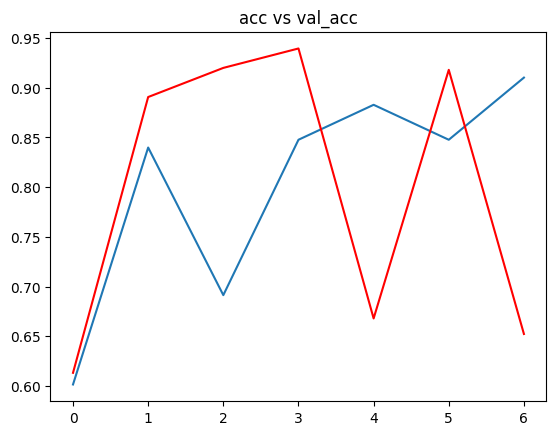

In [21]:
import matplotlib.pyplot as plt

plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c = "red")

plt.title("acc vs val_acc")
plt.show
# val_acc is performing better

<function matplotlib.pyplot.show(close=None, block=None)>

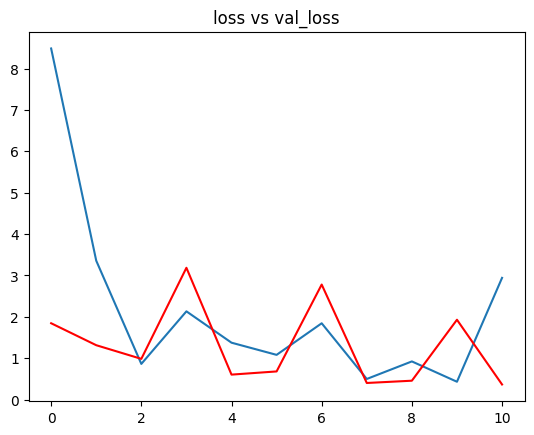

In [20]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c = "red")

plt.title("loss vs val_loss")
plt.show
# val loss = 0.4 

In [21]:
from keras.preprocessing import image
from PIL import Image

In [22]:
def predict1(pred):
    if pred > 0.5:
        print("Healthy")
    else:
        print("Brain Tumor")

In [ ]:
# path for the image to see if it predics correct class
# Healthy/Not Cancer  (669).jpg download.jfif
path = "/Downloads/download.jfif" 
img = image.load_img(path, target_size=(224, 224))

i = image.img_to_array(img)/255
input_arr = np.array([i])

pred = (model.predict(input_arr))
print(predict1(pred[0,0]))

# to display the image 
plt.imshow(input_arr[0]) 
plt.title("input image") 
plt.show()


In [24]:
def show_i(t):
    show = t.numpy()[0]
    num = show.shape[-1]
    print("filters: ", num)
    n_s = int(round(num ** 0.5, 0))
    if num ** 0.5 - n_s > 0.0:
        n_s+=1
    
    fig = plt.figure(figsize=(10,10))
    
    for n in range(num):
        
        ax = fig.add_subplot(n_s,n_s,n+1)
        ax.imshow(show[:,:, n], cmap=plt.cm.jet)
        #ax.imshow(show[:,:, n])
        plt.xticks([])
        plt.yticks([])
    plt.show()


filters:  3


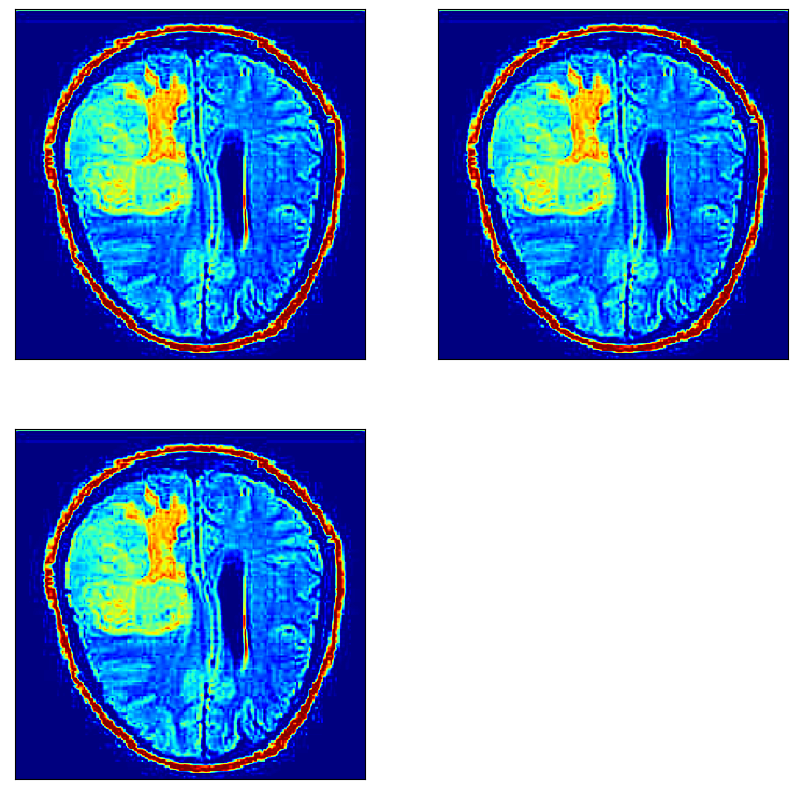

filters:  32


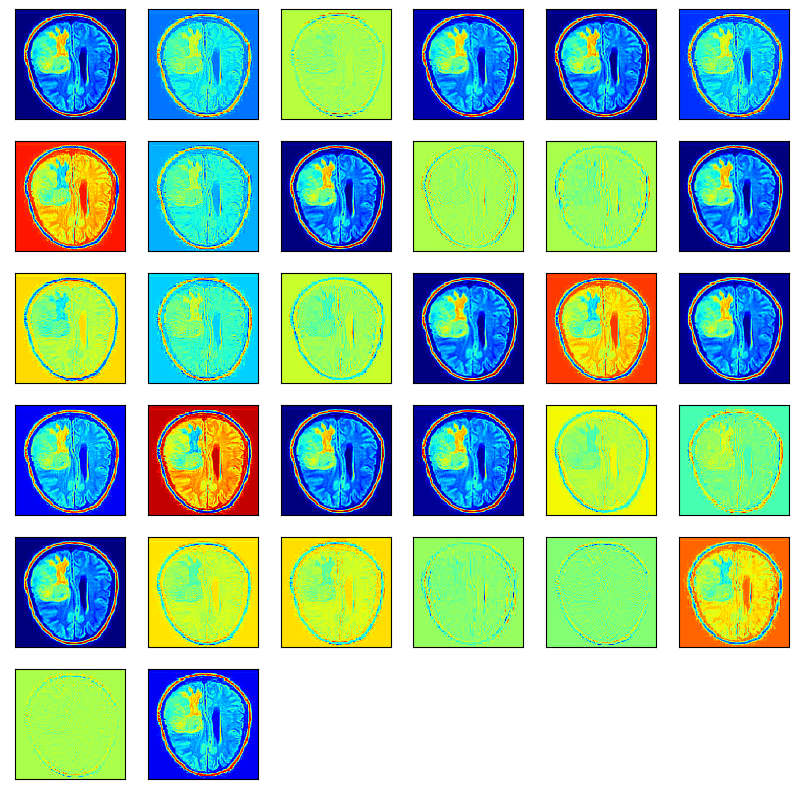

filters:  32


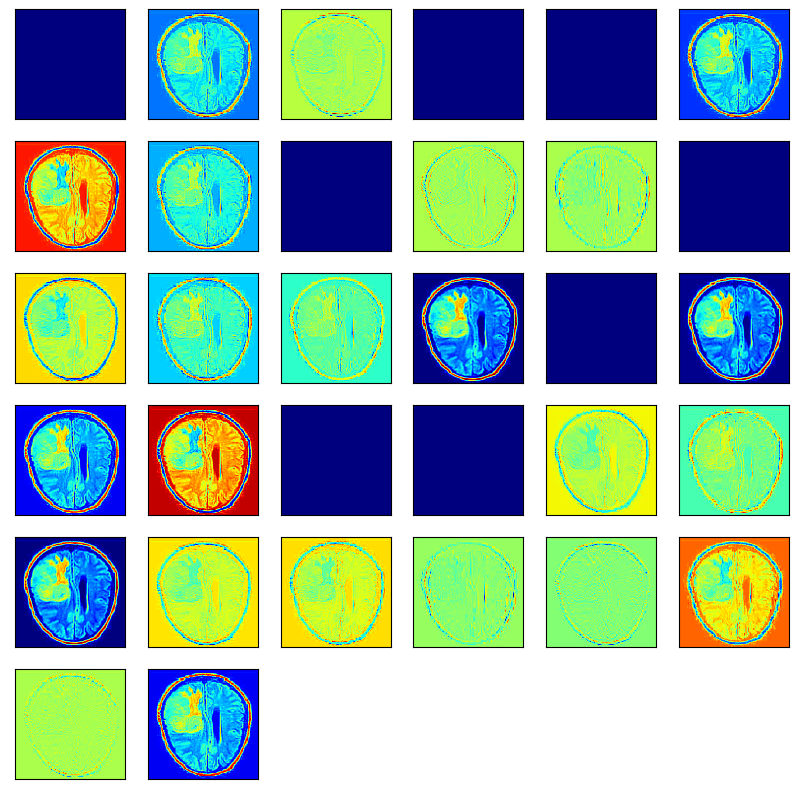

filters:  32


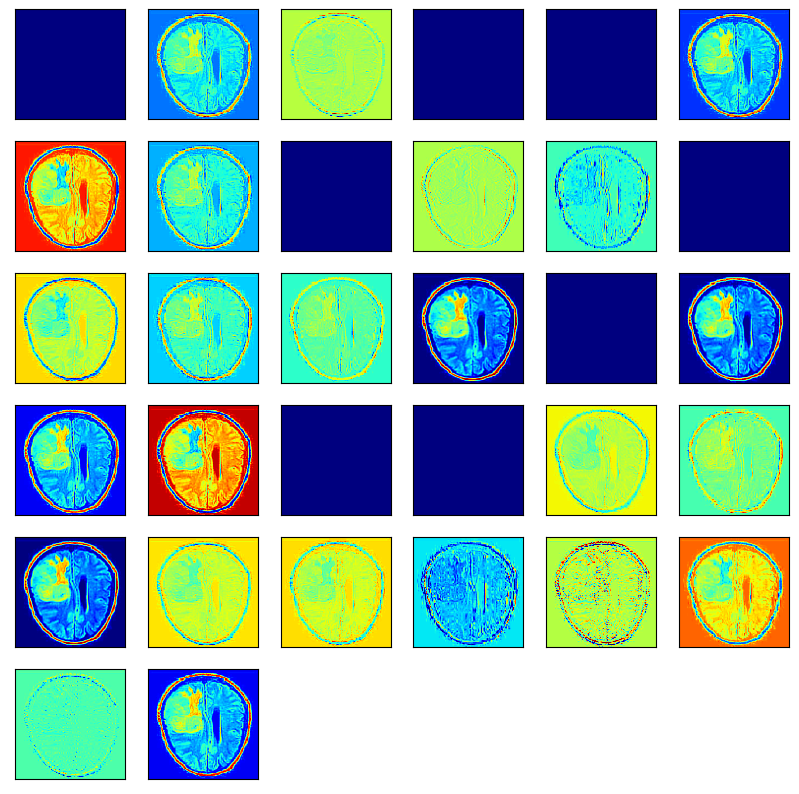

filters:  32


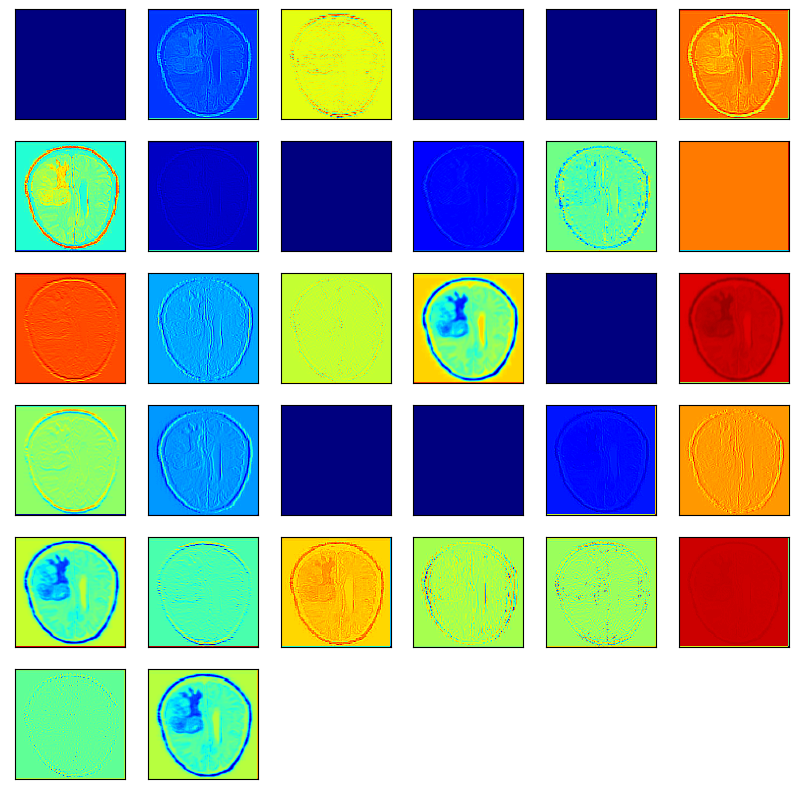

In [25]:
y = input_arr
result_list = []

n = 0

for l in model.layers[:5]:
    y = l(y)
    result_list.append(y)
    
    show_i(y)